In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [2]:
# selecting the dataset folder
!ls '/content/gdrive/My Drive/CovidFakeNews'

Dataset


In [3]:
!pip install --upgrade tensorflow-gpu==2.0

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 3.8MB 36.9MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 450kB 52.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=ecbe4f7eac68c98407c40943642ac5094128c05a694dffe3099d10ced0e815e8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installa

In [4]:
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model


Requirement already up-to-date: nbformat in /usr/local/lib/python3.7/dist-packages (5.1.3)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#!unzip '/content/gdrive/MyDrive/CovidFakeNews/Dataset/Dataset.zip' -d '/content/gdrive/MyDrive/CovidFakeNews/Dataset'

In [6]:
%cd '/content/gdrive/My Drive/CovidFakeNews/Dataset'

/content/gdrive/My Drive/CovidFakeNews/Dataset


In [14]:
# reading the true news of covid
df_real = pd.read_csv("NewsRealCOVID-19.csv")
df_real_5 = pd.read_csv("NewsRealCOVID-19_5.csv")
df_real_7 = pd.read_csv("NewsRealCOVID-19_7.csv")

In [15]:
# reading the false news of covid
df_fake = pd.read_csv("NewsFakeCOVID-19.csv")
df_fake_5 = pd.read_csv("NewsFakeCOVID-19_5.csv")
df_fake_7 = pd.read_csv("NewsFakeCOVID-19_7.csv")

In [18]:
# setting isFake column in the true news of covid
df_real['isFake']=0
df_real_5['isFake']=0
df_real_7['isFake']=0

In [19]:
df_real.head()
df_real_5.head()
df_real_7.head()

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords,isFake
0,1555,article,healthline.com,https://www.healthline.com/health-news/how-to-...,How to Enjoy the Fourth of July Weekend Amid t...,"""How to Enjoy Fourth of July Weekend Amid the ...",experts recommend everyone avoid large gatheri...,experts recommend everyone avoid large gatheri...,NaN,"""COVID19 coronavirus prevention advice July 4 ...",0
1,1556,article,healthline.com,https://www.healthline.com/health-news/cdc-exp...,CDC Expands List of Those with Higher COVID-19...,"""CDC Expands List of Those with Higher COVID-1...",experts say the key is to stay in the know and...,officials at the centers for disease control a...,NaN,"""CDC list expanded COVID-19 coronavirus higher...",0
2,1557,article,healthline.com,https://www.healthline.com/health-news/feds-wa...,Feds Warn That Face Mask ‘Exemption’ Cards Are...,"""Feds Warn That Face Mask ‘Exemption’ Cards Ar...",some people have reportedly been presenting fa...,reports of people presenting cards that claim ...,NaN,"""covid 19, coronavirus, face mask exemption ca...",0
3,1558,article,healthline.com,https://www.healthline.com/health-news/experts...,Experts Confident Biden’s COVID-19 Response Co...,"""Experts Confident Biden's COVID-19 Response C...",medical experts say they believe bidens plan t...,medical experts say they believe bidens plan t...,NaN,"""covid 19, coronavirus, testing and tracing""",0
4,1559,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,NaN,"""covid19 coronavirus outbreak research progres...",0


In [21]:
# setting isFake column in the true news of covid
df_fake['isFake']=1
df_fake_5['isFake']=1
df_fake_7['isFake']=1

In [22]:
df_fake.head()
df_fake_5.head()
df_fake_7.head()

,Unnamed: 0,type,fact_check_url,archieve,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,isFake
0,623,post,https://www.factcheck.org/2020/07/face-mask-ex...,http://archive.is/LC508,https://www.facebook.com/tednugent/photos/a.10...,NaN,NaN,NaN,NaN,A “face mask exempt card” shared on social med...,"""Ted Nugent""",snag limbrats that daddy 22s out of the toweri...,ted nugent added a new photo ..,NaN,"""""",1
1,624,post,https://www.factcheck.org/2020/07/video-presen...,http://archive.is/l3qLv,https://www.facebook.com/jeff.neff.528/videos/...,NaN,NaN,NaN,NaN,A test on video with a gas detector shows that...,"""Jeff""",see more of jeff neff on facebook.,face masks you decide. this is worth a few min...,NaN,"""""",1
2,625,post,https://www.factcheck.org/2020/06/painting-of-...,http://archive.is/vv6OB,https://twitter.com/SexCounseling/status/12764...,https://www.facebook.com/photo.php?fbid=102138...,https://www.facebook.com/112390917148814/posts...,NaN,NaN,A painting depicting children in face masks wa...,"""""",we 've detected that javascript is disabled in...,NaN,NaN,"""""",1
3,626,article,https://healthfeedback.org/claimreview/contrar...,https://archive.is/51Jn0,https://www.wakingtimes.com/2020/05/15/bill-ga...,NaN,NaN,NaN,NaN,According to Bill Gates the COVID-19 RNA vacci...,"""403 Forbidden""",NaN,NaN,NaN,"""""",1
4,627,post,https://www.factcheck.org/2020/06/meme-misrepr...,NaN,https://www.facebook.com/photo.php?fbid=424048...,NaN,NaN,NaN,NaN,Meme shows Florida Surgeon General saying: Eve...,"""Jeff Cloud""",see more of jeff cloud on facebook.,it 's all coming out now .....,NaN,"""""",1


In [23]:
df= pd.concat([df_real,df_real_5,df_real_7,df_fake,df_fake_5,df_fake_7]).reset_index(drop = True)

In [24]:
df

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords,isFake,archieve,news_url2,news_url3,news_url4,news_url5
0,2658,article,healthline.com,https://www.healthline.com/health-news/what-we...,What We Can Learn from the Resurgence of COVID...,"""What We Can Learn from the Resurgence of COVI...",experts say crowded beaches like this one in b...,experts say covid-19 cases have surged in spai...,NaN,"""spain resurgence covid19 coronavirus cases le...",0,NaN,NaN,NaN,NaN,NaN
1,2659,article,healthline.com,https://www.healthline.com/health-news/why-app...,Why Approving a COVID-19 Vaccine Too Early Cou...,"""Why Approving a COVID-19 Vaccine Too Early Co...",increasing number of healthcare experts say th...,increasing number of healthcare experts say th...,NaN,"""covid-19, coronavirus, viral infection, vacci...",0,NaN,NaN,NaN,NaN,NaN
2,2660,article,healthline.com,https://www.healthline.com/health-news/flu-all...,Not Sure You Have COVID-19? Here Are the Sympt...,"""Different Symptoms for Coronavirus, Flu, and ...",fatigue and body aches are symptoms of both fl...,fatigue and body aches are symptoms of both fl...,NaN,"""flu symptoms allergy symptoms coronavirus sym...",0,NaN,NaN,NaN,NaN,NaN
3,2661,article,healthline.com,https://www.healthline.com/health-news/flu-stu...,Flu Study Highlights Difficulty of Achieving C...,"""Flu Study Highlights Difficulty of Achieving ...",researchers say women are more likely than men...,researchers say women are more likely than men...,NaN,"""covid19 coronavirus vaccine 80 percent effect...",0,NaN,NaN,NaN,NaN,NaN
4,2662,article,healthline.com,https://www.healthline.com/health-news/resign-...,Resign or Return? The Dilemma Facing Classroom...,"""Resign or Return? The Dilemma for Classroom T...",some teachers have quit while others have sued...,as some schools are ordered to reopen many tea...,NaN,"""covid19 coronavirus school classrooms reopeni...",0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,884,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://www.facebook.com/BrokerCam/posts/11001...,Trey Gowdy said coronavirus shutdowns were sus...,"""Log In or Sign Up to View""",do you want to join facebook ?.,NaN,NaN,"""""",1,https://web.archive.org/web/20200422222546/htt...,NaN,NaN,NaN,NaN
4500,885,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://www.facebook.com/watch/?v=619001568957940,All elective or non-emergency surgeries are ba...,"""Top Scientist: More Cancer Deaths DUE to Lock...",in the uk the director of king college london ...,top scientist more cancer deaths due to lockdo...,NaN,"""""",1,https://web.archive.org/web/20200423115049/htt...,NaN,NaN,NaN,NaN
4501,886,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://www.facebook.com/photo.php?fbid=273325...,U.S. House Speaker Nancy Pelosi was in Wuhan C...,"""Viviane Dinehart""",see more of viviane dinehart on facebook.,NaN,NaN,"""""",1,https://web.archive.org/web/20200423200450/htt...,NaN,NaN,NaN,NaN
4502,887,post,https://leadstories.com/hoax-alert/2020/04/fac...,https://www.facebook.com/CaptRandall/posts/102...,U.S. House Speaker Nancy Pelosi was in Wuhan C...,"""Randall Thompson""",see more of randall thompson on facebook.,pelosi was in wouhan china 6 days after the im...,NaN,"""""",1,http://web.archive.org/web/20200430171759/http...,NaN,NaN,NaN,NaN


In [25]:
df.drop(columns = ['publish_date'], inplace = True)

In [26]:
df['original'] = df['title'] + ' ' + df['newstitle'] + ' ' + df['content'] + ' ' + df['abstract'] 

In [27]:
df

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,meta_keywords,isFake,archieve,news_url2,news_url3,news_url4,news_url5,original
0,2658,article,healthline.com,https://www.healthline.com/health-news/what-we...,What We Can Learn from the Resurgence of COVID...,"""What We Can Learn from the Resurgence of COVI...",experts say crowded beaches like this one in b...,experts say covid-19 cases have surged in spai...,"""spain resurgence covid19 coronavirus cases le...",0,NaN,NaN,NaN,NaN,NaN,What We Can Learn from the Resurgence of COVID...
1,2659,article,healthline.com,https://www.healthline.com/health-news/why-app...,Why Approving a COVID-19 Vaccine Too Early Cou...,"""Why Approving a COVID-19 Vaccine Too Early Co...",increasing number of healthcare experts say th...,increasing number of healthcare experts say th...,"""covid-19, coronavirus, viral infection, vacci...",0,NaN,NaN,NaN,NaN,NaN,Why Approving a COVID-19 Vaccine Too Early Cou...
2,2660,article,healthline.com,https://www.healthline.com/health-news/flu-all...,Not Sure You Have COVID-19? Here Are the Sympt...,"""Different Symptoms for Coronavirus, Flu, and ...",fatigue and body aches are symptoms of both fl...,fatigue and body aches are symptoms of both fl...,"""flu symptoms allergy symptoms coronavirus sym...",0,NaN,NaN,NaN,NaN,NaN,Not Sure You Have COVID-19? Here Are the Sympt...
3,2661,article,healthline.com,https://www.healthline.com/health-news/flu-stu...,Flu Study Highlights Difficulty of Achieving C...,"""Flu Study Highlights Difficulty of Achieving ...",researchers say women are more likely than men...,researchers say women are more likely than men...,"""covid19 coronavirus vaccine 80 percent effect...",0,NaN,NaN,NaN,NaN,NaN,Flu Study Highlights Difficulty of Achieving C...
4,2662,article,healthline.com,https://www.healthline.com/health-news/resign-...,Resign or Return? The Dilemma Facing Classroom...,"""Resign or Return? The Dilemma for Classroom T...",some teachers have quit while others have sued...,as some schools are ordered to reopen many tea...,"""covid19 coronavirus school classrooms reopeni...",0,NaN,NaN,NaN,NaN,NaN,Resign or Return? The Dilemma Facing Classroom...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,884,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://www.facebook.com/BrokerCam/posts/11001...,Trey Gowdy said coronavirus shutdowns were sus...,"""Log In or Sign Up to View""",do you want to join facebook ?.,NaN,"""""",1,https://web.archive.org/web/20200422222546/htt...,NaN,NaN,NaN,NaN,NaN
4500,885,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://www.facebook.com/watch/?v=619001568957940,All elective or non-emergency surgeries are ba...,"""Top Scientist: More Cancer Deaths DUE to Lock...",in the uk the director of king college london ...,top scientist more cancer deaths due to lockdo...,"""""",1,https://web.archive.org/web/20200423115049/htt...,NaN,NaN,NaN,NaN,All elective or non-emergency surgeries are ba...
4501,886,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://www.facebook.com/photo.php?fbid=273325...,U.S. House Speaker Nancy Pelosi was in Wuhan C...,"""Viviane Dinehart""",see more of viviane dinehart on facebook.,NaN,"""""",1,https://web.archive.org/web/20200423200450/htt...,NaN,NaN,NaN,NaN,NaN
4502,887,post,https://leadstories.com/hoax-alert/2020/04/fac...,https://www.facebook.com/CaptRandall/posts/102...,U.S. House Speaker Nancy Pelosi was in Wuhan C...,"""Randall Thompson""",see more of randall thompson on facebook.,pelosi was in wouhan china 6 days after the im...,"""""",1,http://web.archive.org/web/20200430171759/http...,NaN,NaN,NaN,NaN,U.S. House Speaker Nancy Pelosi was in Wuhan C...


In [28]:
df['original'][0]

'What We Can Learn from the Resurgence of COVID-19 in Spain "What We Can Learn from the Resurgence of COVID-19 in Spain" experts say crowded beaches like this one in barcelona are part of reason spain is experiencing increase in covid-19 cases. getty images spain is experiencing resurgence of covid-19 cases after lockdowns this spring had brought disease under control. experts say spike has occurred because businesses reopened too soon and public gatherings were held without proper safety precautions. they add that spains federal government has passed along responsibility for containing.  experts say covid-19 cases have surged in spain because businesses reopened too soon and public gatherings were allowed to happen without proper safety precautions .. '

In [29]:
#data cleaning
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
# removing extra useless words from data 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) 

In [31]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
# now remove these stopwords from our data
def preprocess(text):
  result= []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >3 and token not in stop_words:
      result.append(token)
  return result    

In [37]:
# removing Nan values as it was not preprocessing
df1 = df.replace(np.nan, '', regex=True)

In [ ]:
df1

In [40]:
# new preprocessed column
df1['clean'] = df1['original'].apply(preprocess)

In [42]:
# obtain totlal words
list_of_words = []
for i in df1.clean:
  for j in i:
    list_of_words.append(j)

In [43]:
len(list_of_words)

177803

In [44]:
total_words = len(list(set(list_of_words)))
total_words

12356

In [46]:
#joining words into gifts
df1['clean_joined'] = df1['clean'].apply(lambda x:" ".join(x))

In [47]:
df1

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,meta_keywords,isFake,archieve,news_url2,news_url3,news_url4,news_url5,original,clean,clean_joined
0,2658,article,healthline.com,https://www.healthline.com/health-news/what-we...,What We Can Learn from the Resurgence of COVID...,"""What We Can Learn from the Resurgence of COVI...",experts say crowded beaches like this one in b...,experts say covid-19 cases have surged in spai...,"""spain resurgence covid19 coronavirus cases le...",0,,,,,,What We Can Learn from the Resurgence of COVID...,"[learn, resurgence, covid, spain, learn, resur...",learn resurgence covid spain learn resurgence ...
1,2659,article,healthline.com,https://www.healthline.com/health-news/why-app...,Why Approving a COVID-19 Vaccine Too Early Cou...,"""Why Approving a COVID-19 Vaccine Too Early Co...",increasing number of healthcare experts say th...,increasing number of healthcare experts say th...,"""covid-19, coronavirus, viral infection, vacci...",0,,,,,,Why Approving a COVID-19 Vaccine Too Early Cou...,"[approving, covid, vaccine, early, cause, harm...",approving covid vaccine early cause harm good ...
2,2660,article,healthline.com,https://www.healthline.com/health-news/flu-all...,Not Sure You Have COVID-19? Here Are the Sympt...,"""Different Symptoms for Coronavirus, Flu, and ...",fatigue and body aches are symptoms of both fl...,fatigue and body aches are symptoms of both fl...,"""flu symptoms allergy symptoms coronavirus sym...",0,,,,,,Not Sure You Have COVID-19? Here Are the Sympt...,"[sure, covid, symptoms, coronavirus, allergies...",sure covid symptoms coronavirus allergies diff...
3,2661,article,healthline.com,https://www.healthline.com/health-news/flu-stu...,Flu Study Highlights Difficulty of Achieving C...,"""Flu Study Highlights Difficulty of Achieving ...",researchers say women are more likely than men...,researchers say women are more likely than men...,"""covid19 coronavirus vaccine 80 percent effect...",0,,,,,,Flu Study Highlights Difficulty of Achieving C...,"[study, highlights, difficulty, achieving, cov...",study highlights difficulty achieving covid he...
4,2662,article,healthline.com,https://www.healthline.com/health-news/resign-...,Resign or Return? The Dilemma Facing Classroom...,"""Resign or Return? The Dilemma for Classroom T...",some teachers have quit while others have sued...,as some schools are ordered to reopen many tea...,"""covid19 coronavirus school classrooms reopeni...",0,,,,,,Resign or Return? The Dilemma Facing Classroom...,"[resign, return, dilemma, facing, classroom, t...",resign return dilemma facing classroom teacher...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,884,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://www.facebook.com/BrokerCam/posts/11001...,Trey Gowdy said coronavirus shutdowns were sus...,"""Log In or Sign Up to View""",do you want to join facebook ?.,,"""""",1,https://web.archive.org/web/20200422222546/htt...,,,,,,[],
4500,885,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://www.facebook.com/watch/?v=619001568957940,All elective or non-emergency surgeries are ba...,"""Top Scientist: More Cancer Deaths DUE to Lock...",in the uk the director of king college london ...,top scientist more cancer deaths due to lockdo...,"""""",1,https://web.archive.org/web/20200423115049/htt...,,,,,All elective or non-emergency surgeries are ba...,"[elective, emergency, surgeries, banned, prior...",elective emergency surgeries banned prioritize...
4501,886,post,https://leadstories.com/hoax-alert/2020/04/Fac...,https://www.facebook.com/photo.php?fbid=273325...,U.S. House Speaker Nancy Pelosi was in Wuhan C...,"""Viviane Dinehart""",see more of viviane dinehart on facebook.,,"""""",1,https://web.archive.org/web/20200423200450/htt...,,,,,,[],
4502,887,post,https://leadstories.com/hoax-alert/2020/04/fac...,https://www.facebook.com/CaptRandall/posts/102...,U.S. House Speaker Nancy Pelosi was 

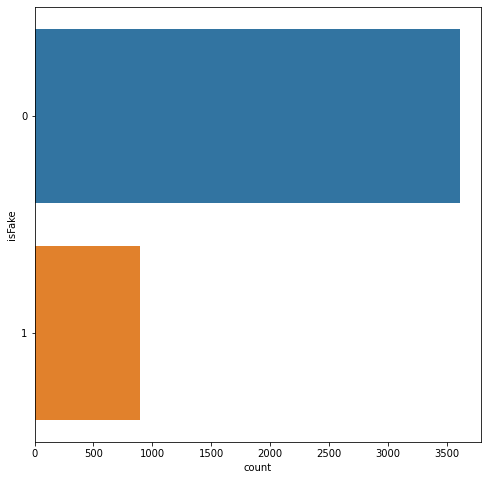

In [49]:
#visulaize the data 
plt.figure(figsize= (8,8))
sns.countplot(y= "isFake", data=df1)

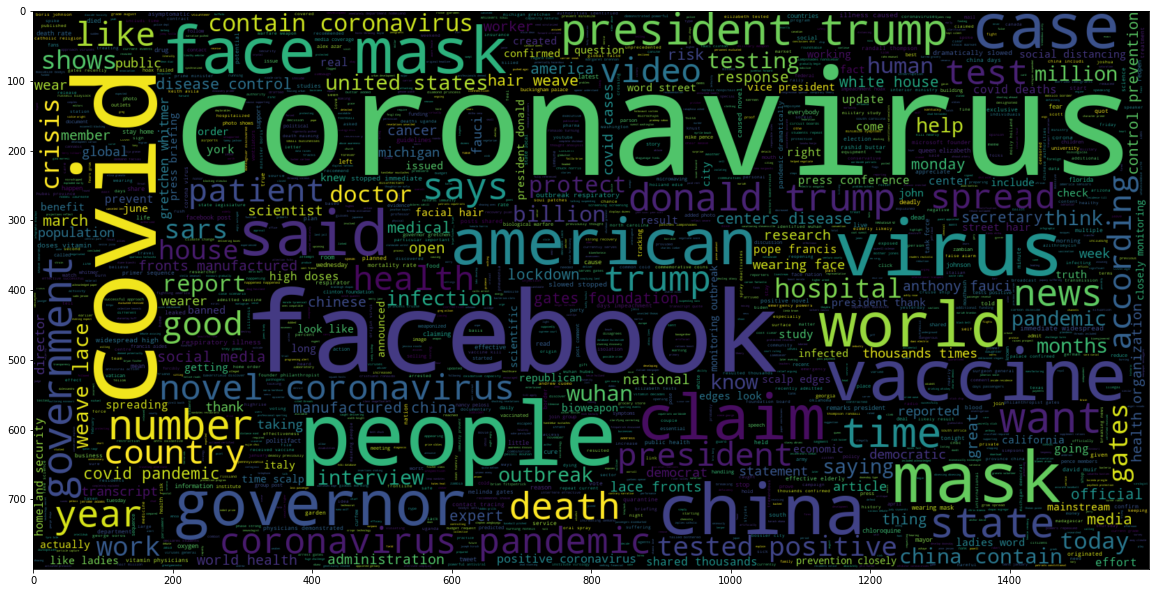

In [50]:
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=20000, width= 1600, height=800, stopwords= stop_words).generate(" ".join(df1[df1.isFake == 1].clean_joined))
plt.imshow(wc, interpolation='bilinear')

In [52]:
# obtain layer of max no. of words to create word embedding
maxlen =-1
for doc in df1.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
      maxlen = len(tokens)
print("Max number of word is ", maxlen)

Max number of word is  974


In [54]:
# visualize the distribution of numbrt of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df1.clean_joined], nbins = 100)
fig.show()

In [55]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.clean_joined, df1.isFake, test_size = 0.2)

In [56]:
from nltk import word_tokenize

In [57]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [58]:
print("The encoding for document\n",df1.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 learn resurgence covid spain learn resurgence covid spain experts crowded beaches like barcelona reason spain experiencing increase covid cases getty images spain experiencing resurgence covid cases lockdowns spring brought disease control experts spike occurred businesses reopened soon public gatherings held proper safety precautions spains federal government passed responsibility containing experts covid cases surged spain businesses reopened soon public gatherings allowed happen proper safety precautions 
 is :  []


In [59]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [60]:
for i,doc in enumerate(padded_train[:10]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
The padded encoding for document 2  is :  [1172  469 1277    2    5    1   61  242  300 2220 2221   61  595  300
  269  626 2636  741  663   14 2220  230 3232 1401 2890  370  116  398
 3707 3708   24 1929  742  100 1278  434  722  871  165  438]
The padded encoding for document 3  is :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
The padded encoding for document 4  is :  [ 596  227 1278 4319   15  596  227 1278 4319   15 1555  471  227 1003
  116   15 1228 3233   63 3234 5309 1555  227 1004 2891    2 1556 4320
   63 1228 3233 2060   86  909 2392  270 3235  197  758  525]
The padded encoding for document 5  is :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
The padded encoding for document 6  is :  [ 271   13   40    1  272  271   13   40    1  272   11  271  371  379
   25 3236 2393   13

In [61]:
# train and building the model
model = Sequential()
model.add(Embedding(total_words, output_dim=128))
#biredection Rnn
model.add(Bidirectional(LSTM(128)))
#Dense layer
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1581568   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,877,761
Trainable params: 1,877,761
Non-trainable params: 0
_________________________________________________________________


In [62]:
#fit model with data
y_train= np.asarray(y_train)
# train
model.fit(padded_train,y_train,batch_size=64,validation_split=0.1,epochs=2)

Train on 3242 samples, validate on 361 samples
Epoch 1/2
3242/3242 [==============================] - 19s 6ms/sample - loss: 0.4288 - acc: 0.7758 - val_loss: 0.3451 - val_acc: 0.8089
Epoch 2/2
3242/3242 [==============================] - 13s 4ms/sample - loss: 0.3123 - acc: 0.8189 - val_loss: 0.3401 - val_acc: 0.8421


In [63]:
#Asses the trained model
#prediction
pred=model.predict(padded_test)
#if predicted value > 0.5 it is real else fake
prediction = []
for i in range(len(pred)):
    if pred[i].item()>0.5:
       prediction.append(1)
    else:
       prediction.append(0)

In [64]:
#getting the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(list(y_test),prediction)
print("Model Accuracy", accuracy)

Model Accuracy 0.8290788013318535


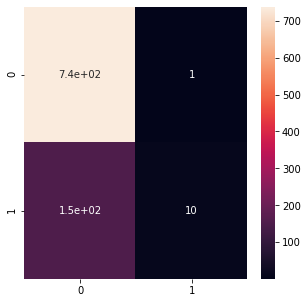

In [66]:
#confusion matrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(list(y_test),prediction)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot= True)